## Clustering with polygons
### Dataset Zgz

This notebook executes ClusterApplication to create a clusters shapefile from the data contained in the specified dataset.

This dataset contains localities from the Spanish area of Zaragoza. Data consists in the polygon geometry and a numeric attribute - the population of the locality.

In [1]:
%matplotlib inline

import subprocess
import matplotlib.pyplot as plt
import shapefile
import numpy as np

### Execution

** Algorithm: ** DBSCAN (eps = 2000, minPts = 0)

** Distance: ** Combined (Hausdorff * 0.6 + AbsoluteDiff * 0.4)

** Results: ** four clusters are generated: three of them contain only the three most populated localities, respectively. The fourth cluster contains every other locality.

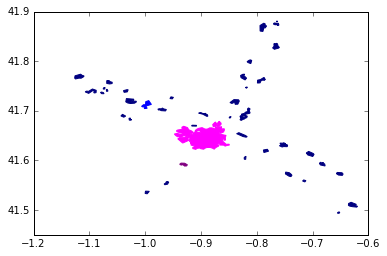

In [10]:
subprocess.call(
    ['java', '-jar', 'combined.jar', 'Zgz', '0.6', '0.4', '2000', '0'], 
    stdout=None, stderr=None)

# Plot elements colored by cluster
colors = ['#FF00FF','#800080','#0000FF','#000080','#00FFFF','#008080','#00FF00','#008000','#FFFF00',
          '#808000','#FF0000','#800000','#C0C0C0','#808080','#000000']

i = 0
sf = shapefile.Reader("cluster")
for sr in sf.shapes():
    j = 0
    mat = np.transpose(sr.points)
    length = np.shape(mat)[1]
    
    parts = sr.parts
    parts = np.append(parts, length)
    parts = parts[1:]
    
    for index in parts:
        points_x = []
        points_y = []

        while j < index:
            points_x = np.append(points_x, [mat[0,j]])
            points_y = np.append(points_y, mat[1,j])
            j = j + 1

        plt.fill(points_x,points_y,color=colors[i])
        
    i = i + 1
        
plt.show()

### Conclusions
This is an accurate clusterization as this area is based in one big city (Zaragoza) and two other smaller towns (Utebo and Cuarte de Huerva), being the rest of the population dispersed in much smaller villages.

### Cleanup

In [14]:
import os, fnmatch
for root, dirs, files in os.walk('.', topdown=False):
    for pattern in ['*.dbf','*.fix','*.prj','*.shp','*.shx']:
        for name in fnmatch.filter(files, pattern):
            os.remove(name)